# Exercise 6

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [3]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [4]:
review = dataset['review'].tolist()
rating = dataset['rating'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(review) * 0.9)

training_review = review[0:training_size]
testing_review = review[training_size:]
training_rating = rating[0:training_size]
testing_rating = rating[training_size:]

# Map ratings: 3-5 → 1 (positive), 1-2 → 0 (negative)
def map_rating_to_sentiment(rating_list):
    return [1 if int(r) > 3 else 0 for r in rating_list]

training_sentiment = map_rating_to_sentiment(training_rating)
testing_sentiment = map_rating_to_sentiment(testing_rating)

training_rating_final = np.array(training_sentiment)
testing_rating_final = np.array(testing_sentiment)


## 1. Tokenize the data

In [5]:
vocab_size = 3000
embedding_dim = 16
max_length = 220
trunc_type='post'
padding_type='post'
oov_tok = ""

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_review)
word_index = tokenizer.word_index


## 2. Sequence the data

In [6]:
training_sequences = tokenizer.texts_to_sequences(training_review)
testing_sequences = tokenizer.texts_to_sequences(testing_review)

## 3. Pad the data

In [7]:
# answer here
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## 4. Train a sentiment model

In [8]:
# answer here

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None, max_length)) # force build
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 220, 16)        │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           119 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,127 (188.00 KB)

 Trainable params: 48,127 (188.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
num_epochs = 100
history = model.fit(training_padded, training_rating_final, epochs=num_epochs, validation_data=(testing_padded, testing_rating_final))


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.5278 - loss: 0.6939 - val_accuracy: 0.1782 - val_loss: 0.7484
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5380 - loss: 0.6914 - val_accuracy: 0.1782 - val_loss: 0.7284
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5471 - loss: 0.6877 - val_accuracy: 0.1782 - val_loss: 0.7239
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5467 - loss: 0.6893 - val_accuracy: 0.1782 - val_loss: 0.7296
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5232 - loss: 0.6891 - val_accuracy: 0.1782 - val_loss: 0.7384
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5590 - loss: 0.6842 - val_accuracy: 0.1782 - val_loss: 0.7015
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5458 - loss: 0.6867 - val_accuracy: 0.1782 - val_loss: 0.7704
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5507 - loss: 0.6904 - val_accuracy: 0.1782 - 

## Get files for visualing the network

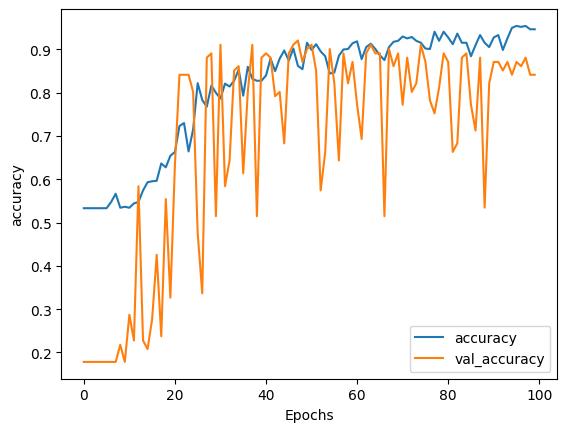

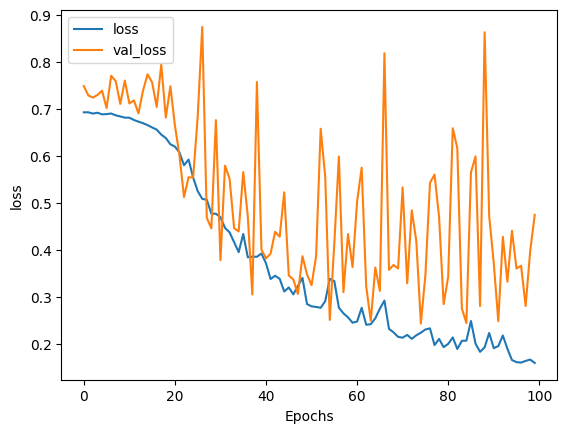

In [10]:
# answer here



import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(3000, 16)


In [12]:

import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index.get(word_num, "")  # safer with get
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [13]:

# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:

print("Number of embeddings:", len(weights))       # Should be vocab_size
print("Number of words in metadata:", len(word_index))  # May be less than vocab_size


Number of embeddings: 3000
Number of words in metadata: 3321


## 5. Predict sentiment with new reviews

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Example negative reviews in Filipino
fake_reviews = [
    "mahaba buhay ng masasama.",
    "Hindi bagay ang size, ang liit kumpara sa description.",
    "Mabaho yung item pagkarating, parang gamit na.",
    "Ang pangit ng quality, madaling masira.",
    "Hindi gumagana, sayang ang pera.",
    "Na-disappoint ako, hindi ito yung inaasahan ko.",
    "Sobrang tagal ng delivery, walang update kahit isa.",
    "Hindi kompleto ang laman ng order, kulang kulang.",
    "Parang secondhand yung dumating, hindi worth it.",
]

print("Test reviews:")
print(fake_reviews)

# Tokenization and padding
padding_type = 'post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

# Predict the sentiment classes using your model
classes = model.predict(fakes_padded)

# Output predictions
# Assuming binary classification: closer to 0 = negative, closer to 1 = positive
for i in range(len(fake_reviews)):
    print(f"Review: {fake_reviews[i]}")
    print(f"Predicted Sentiment Score: {classes[i][0]:.4f}")
    print("Sentiment:", "Positive" if classes[i][0] > 0.5 else "Negative")
    print('\n')


Test reviews:
['mahaba buhay ng masasama.', 'Hindi bagay ang size, ang liit kumpara sa description.', 'Mabaho yung item pagkarating, parang gamit na.', 'Ang pangit ng quality, madaling masira.', 'Hindi gumagana, sayang ang pera.', 'Na-disappoint ako, hindi ito yung inaasahan ko.', 'Sobrang tagal ng delivery, walang update kahit isa.', 'Hindi kompleto ang laman ng order, kulang kulang.', 'Parang secondhand yung dumating, hindi worth it.']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Review: mahaba buhay ng masasama.
Predicted Sentiment Score: 0.3253
Sentiment: Negative


Review: Hindi bagay ang size, ang liit kumpara sa description.
Predicted Sentiment Score: 0.2181
Sentiment: Negative


Review: Mabaho yung item pagkarating, parang gamit na.
Predicted Sentiment Score: 0.2965
Sentiment: Negative


Review: Ang pangit ng quality, madaling masira.
Predicted Sentiment Score: 0.4249
Sentiment: Negative


Review: Hindi gumag